In [1]:
# Gates code for FP 

## Textmining Naive Bayes Example
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


import codecs
from sklearn import feature_extraction

#Convert a collection of raw documents to a matrix of TF-IDF features.
#Equivalent to CountVectorizer but with tf-idf norm
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import os.path

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [2]:
df =  pd.read_csv("C:/Users/aivii/programsmm/FP736/corpus/combined_csv1.csv")
print(df.head)
df = df.drop(df.columns[[0]], axis=1) # remove the first column 
df.head()

<bound method NDFrame.head of        Unnamed: 0  label                                            reviews
0               0      1  I went and saw this movie last night after bei...
1               1      1  Actor turned director Bill Paxton follows up h...
2               2      1  As a recreational golfer with some knowledge o...
3               3      1  I saw this film in a sneak preview, and it is ...
4               4      1  Bill Paxton has taken the true story of the 19...
...           ...    ...                                                ...
49995       24995      0  Towards the end of the movie, I felt it was to...
49996       24996      0  This is the kind of movie that my enemies cont...
49997       24997      0  I saw 'Descent' last night at the Stockholm Fi...
49998       24998      0  Some films that you pick up for a pound turn o...
49999       24999      0  This is one of the dumbest films, I've ever se...

[50000 rows x 3 columns]>


,label,reviews
0,1,I went and saw this movie last night after bei...
1,1,Actor turned director Bill Paxton follows up h...
2,1,As a recreational golfer with some knowledge o...
3,1,"I saw this film in a sneak preview, and it is ..."
4,1,Bill Paxton has taken the true story of the 19...


C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


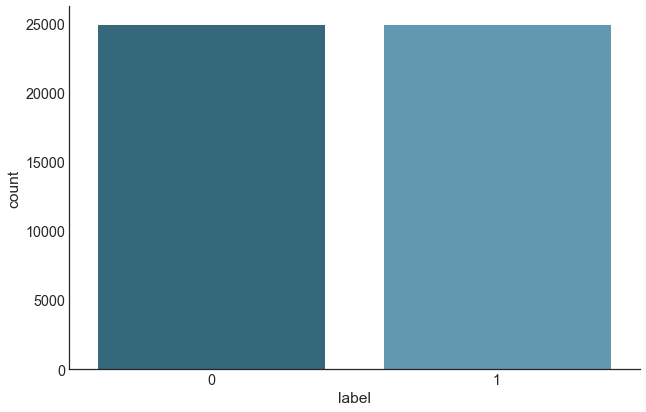

In [80]:
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.style.use(u'seaborn-white')
plt.show();

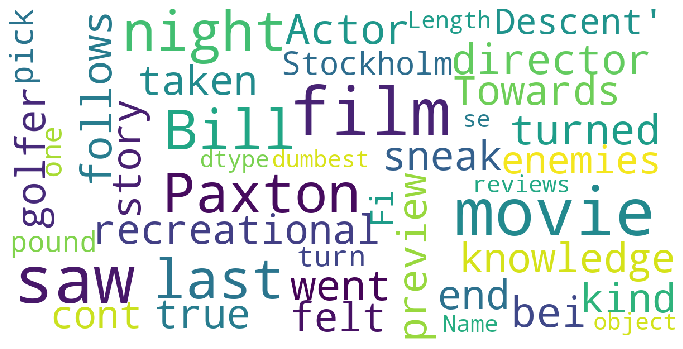

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews'])


In [5]:
## Generating one row  
rows = df.sample(frac =.75) 
  
## Checking if sample is 0.75 times data or not 
  
if (0.75*(len(df))== len(rows)): 
    print( "Cool") 
    print(len(df), len(rows)) 
  
## Display 
print(rows)

Cool
50000 37500
       label                                            reviews
29783      1  In his first go as a Hollywood director, Henry...
16043      0  hair, the movie based on the broadway hit,fail...
4120       1    Emilio Estevez takes the wonderful play HOME...
13711      0  Julie Delpy stars in this horrific film about ...
23380      0  Franco films can be divided into 4 categories-...
...      ...                                                ...
1518       1  It was so very long ago (1960), but I have nev...
20157      0  It doesn't surprise me that the makers of this...
45342      0  I cannot see why filmmakers remade this movie....
38348      0  I'll give writer/director William Gove credit ...
32708      1  First, this is a review of the two disc set th...

[37500 rows x 2 columns]


In [6]:
rows.shape

(37500, 2)

C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aivii\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


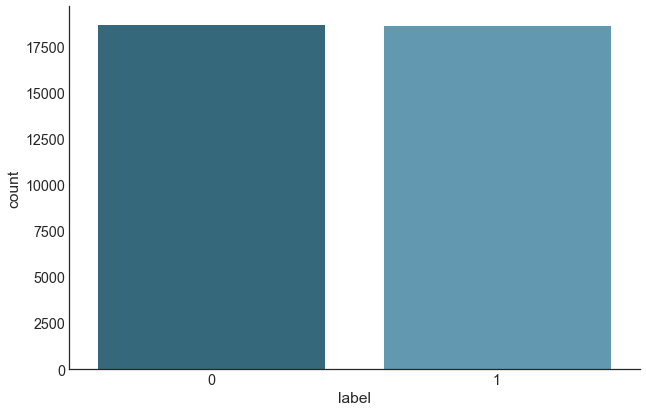

In [7]:
sns.factorplot(x="label", data=rows, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.style.use(u'seaborn-white')
plt.show();

In [8]:
rows.to_csv(r'C:\Users/aivii\programsmm\FP736\COMBINED_TEST_TR.csv', index = False)

In [9]:
RawfileName0="C:/Users/aivii/programsmm/FP736/COMBINED_TEST_TR.csv"

In [10]:
## This file has a header. 
## It has "setinment" and "review" on the first row.

## We will create a list of labels and a list of reviews
AllReviewsList=[]
AllLabelsList=[]

with open(RawfileName0,'r', encoding="utf8") as FILE:
    FILE.readline() # skip header line - skip row 1
    ## This reads the line and so does nothing with it
    for row in FILE:
        NextLabel,NextReview=row.split(",", 1)
        #print(Label)
        #print(Review)
        AllReviewsList.append(NextReview)
        AllLabelsList.append(NextLabel)

#print(AllReviewsList)
#print(AllLabelsList) # all the labels 

In [11]:
REPLACE_NO_SPACE = re.compile("()|(%)|(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\*+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

In [12]:
AllReviewList_clean = preprocess_reviews(AllReviewsList)
print(AllReviewList_clean[5])

i have grown up reading modesty blaise both the comics and the books and she truly is a heroine to me although not being a great fan of quentin tarantino i anyway was interested to hear a few years back that he was considering making a film of her could he finally give modesty a nice big screen treatment she's worthy of i heard of 'my name is modesty' a few months ago and checked the stars it had been given here and wasn't too surprised to find out the score was not too high since beloved characters often have hard time melting the fans' heart if not done exactly right so i decided not to read any reviews and see the film instead and well i just finished watching it and i'm stunned and sad and yeah pretty furious too sad and furious of giving over an hour of my time seeing something so fabulous as modesty blaise character being turned into a film that has nothing to give to a viewer or a fan  it seems that almost everything about this film is sub par and unprofessional although i must 

In [13]:
"""from nltk.corpus import stopwords
print(stopwords.words('english'))"""

"from nltk.corpus import stopwords\nprint(stopwords.words('english'))"

In [14]:
# no point removing them now
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
mine_stop_words = ['in', 'of', 'at', 'a', 'the','movie','film','actor', 'actors']
extend_stop_words = english_stop_words+mine_stop_words 

"""def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in extend_stop_words])
        )
    return removed_stop_words

AllReviewList_cl_nstop = remove_stop_words(AllReviewList_clean)"""

"def remove_stop_words(corpus):\n    removed_stop_words = []\n    for review in corpus:\n        removed_stop_words.append(\n            ' '.join([word for word in review.split() \n                      if word not in extend_stop_words])\n        )\n    return removed_stop_words\n\nAllReviewList_cl_nstop = remove_stop_words(AllReviewList_clean)"

In [15]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [81]:
## CountVectorizer
My_CV1=CountVectorizer(input='content',
                        stop_words= extend_stop_words,
                        max_features=10000,
                        ngram_range=(1, 2), 
                        analyzer='word', 
                        max_df=1.0, # ignore terms w document freq strictly > threshold 
                        min_df=1, 
                        binary=False,
                        token_pattern=r'\b[^\d\W]+\b'
                        )


## CountVectorizer - Bernouli
My_CV1B=CountVectorizer(input='content',
                        stop_words= extend_stop_words,
                        max_features=10000,
                        ngram_range=(1, 2), 
                        analyzer='word', 
                        max_df=1.0, # ignore terms w document freq strictly > threshold 
                        min_df=1, 
                        binary=True,
                        token_pattern=r'\b[^\d\W]+\b'
                        )



## Tfidf Vectorizer - normalized
My_TF1=TfidfVectorizer(input='content',
                        stop_words=extend_stop_words,
                        max_features=10000,
                        #max_features=2000,
                        #min_df=0.2, 
                        
                        #use_idf=True, 
                        #tokenizer=tokenize_and_stem,
                        ngram_range=(1,3)
                        
                        )


## NOw I can vectorize using my list of complete paths to my files
X_CV1=My_CV1.fit_transform(AllReviewList_clean)
X_CV1B=My_CV1B.fit_transform(AllReviewList_clean)
X_TF1=My_TF1.fit_transform(AllReviewList_clean)

#print(My_CV1.vocabulary_)
#print(My_CV1B.vocabulary_)
#print(My_TF1.vocabulary_)


In [17]:
ColNames=My_CV1.get_feature_names()


## OK good - but we want a document topic model A DTM (matrix of counts)
DataFrame_CV=pd.DataFrame(X_CV1.toarray(), columns=ColNames)
DataFrame_CVB=pd.DataFrame(X_CV1B.toarray(), columns=ColNames)
DataFrame_TF=pd.DataFrame(X_TF1.toarray(), columns=ColNames)

# Update row names with file names
MyDict = {}
for i in range(0, len(AllLabelsList)):
    MyDict[i] = AllLabelsList[i]

#print("MY DICT", MyDict)

In [18]:
DataFrame_CV = DataFrame_CV.rename(MyDict, axis = "index")
DataFrame_CVB = DataFrame_CVB.rename(MyDict, axis = "index")
DataFrame_TF = DataFrame_TF.rename(MyDict, axis = "index")

DataFrame_CV.index.name = 'LABEL'
DataFrame_CVB.index.name = 'LABEL'
DataFrame_TF.index.name = 'LABEL'

## Drop/remove columns not wanted
print(DataFrame_CV.columns)

Index(['aaron', 'abandoned', 'abbott', 'abc', 'abilities', 'ability', 'able',
       'able get', 'able see', 'aboard',
       ...
       'youthful', 'youtube', 'z', 'zane', 'zero', 'zizek', 'zoey', 'zombie',
       'zombies', 'zone'],
      dtype='object', length=10000)


In [19]:
print("\nNumber of columns:")
print(len(DataFrame_CV.columns))


Number of columns:
10000


In [20]:
DataFrame_CV.head(5)

,aaron,abandoned,abbott,abc,abilities,ability,able,able get,able see,aboard,...,youthful,youtube,z,zane,zero,zizek,zoey,zombie,zombies,zone
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
DataFrame_CVB.head(5)

,aaron,abandoned,abbott,abc,abilities,ability,able,able get,able see,aboard,...,youthful,youtube,z,zane,zero,zizek,zoey,zombie,zombies,zone
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
DataFrame_TF.head(5)

,aaron,abandoned,abbott,abc,abilities,ability,able,able get,able see,aboard,...,youthful,youtube,z,zane,zero,zizek,zoey,zombie,zombies,zone
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.036214,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056574
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [23]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)

In [24]:
MyStops=["also", "and", "are", "you", "of", "let", "not", "the", "for", "why", "there", "one", "which", "aaron", "abc", "able"]
for nextcol in DataFrame_CV.columns:
    
    Result=str.isdigit(nextcol) ## Fast way to check numbers
    
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        DataFrame_CV=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

   
    elif(len(str(nextcol))<=3 or (nextcol in MyStops)):
        #print(nextcol)
        DataFrame_CVB=DataFrame_CV.drop([nextcol], axis=1)
        #DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

In [25]:
MyStops=["also", "and", "are", "you", "of", "let", "not", "the", "for", "why", "there", "one", "which", "aaron", "abc", "able"]
for nextcol in DataFrame_CVB.columns:
    
    Result=str.isdigit(nextcol) ## Fast way to check numbers
    
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        DataFrame_CV=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

   
    elif(len(str(nextcol))<=3 or (nextcol in MyStops)):
        #print(nextcol)
        DataFrame_CVB=DataFrame_CVB.drop([nextcol], axis=1)
        DataFrame_TF=DataFrame_TF.drop([nextcol], axis=1)

In [26]:
print(DataFrame_CV.columns)

Index(['aaron', 'abandoned', 'abbott', 'abc', 'abilities', 'ability', 'able',
       'able get', 'able see', 'aboard',
       ...
       'youthful', 'youtube', 'z', 'zane', 'zero', 'zizek', 'zoey', 'zombie',
       'zombies', 'zone'],
      dtype='object', length=10000)


In [27]:
DataFrame_CV.head(5)

,aaron,abandoned,abbott,abc,abilities,ability,able,able get,able see,aboard,...,youthful,youtube,z,zane,zero,zizek,zoey,zombie,zombies,zone
LABEL,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print("\nNumber of columns:")
print(len(DataFrame_CV.columns))


Number of columns:
10000


In [29]:
print("\nNumber of columns:")
print(len(DataFrame_CVB.columns))


Number of columns:
9569


In [30]:
print("\nNumber of columns:")
print(len(DataFrame_TF.columns))


Number of columns:
9570


In [31]:
DataFrame_CV1 = DataFrame_CV.reset_index()
#DataFrame_CV1B = DataFrame_CVB.reset_index()
#DataFrame_TF1 = DataFrame_TF.reset_index()

In [32]:
DataFrame_CV1.head()
#DataFrame_CV1B
#DataFrame_TF1

,LABEL,aaron,abandoned,abbott,abc,abilities,ability,able,able get,able see,...,youthful,youtube,z,zane,zero,zizek,zoey,zombie,zombies,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
DataFrame_CV1B = DataFrame_CVB.reset_index()
DataFrame_TF1 = DataFrame_TF.reset_index()

In [34]:
print("\nNumber of columns:")
print(len(DataFrame_CV1.columns))


Number of columns:
10001


In [35]:
print("\nNumber of columns:")
print(len(DataFrame_CV1B.columns))


Number of columns:
9570


In [36]:
print("\nNumber of columns:")
print(len(DataFrame_TF1.columns))


Number of columns:
9571


### __k-means__

In [37]:
# Convert DataFrame to matrix
MyMatrixClean = DataFrame_CV1.values
## Check it
print(type(MyMatrixClean))
print(MyMatrixClean)

# Using sklearn
## you will need
from sklearn.cluster import KMeans
import numpy as np
kmeans_object2 = sklearn.cluster.KMeans(n_clusters=3)
#print(kmeans_object)


<class 'numpy.ndarray'>
[['1' 0 0 ... 0 0 0]
 ['0' 0 0 ... 0 0 0]
 ['1' 0 0 ... 0 0 0]
 ...
 ['0' 0 0 ... 0 0 0]
 ['0' 0 0 ... 0 0 0]
 ['1' 0 0 ... 0 0 0]]


In [38]:
kmeans_object2.fit(MyMatrixClean)
# Get cluster assignment labels
labels2 = kmeans_object2.labels_
print("k-means with k = 3\n", labels2)
# Format results as a DataFrame
Myresults2 = pd.DataFrame([DataFrame_TF1.index,labels2]).T
print("k means RESULTS\n", Myresults2)

k-means with k = 3
 [2 2 2 ... 2 2 2]
k means RESULTS
            0  1
0          0  2
1          1  2
2          2  2
3          3  0
4          4  2
...      ... ..
37495  37495  1
37496  37496  1
37497  37497  2
37498  37498  2
37499  37499  2

[37500 rows x 2 columns]


##### Test Train split

In [39]:
## Train, Test split - Count Vectorizer 
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDF, TestDF = train_test_split(DataFrame_CV1, test_size=0.3)

## Now we have a training set and a testing set. 
print("\nThe training set is:")
print(TrainDF)
print("\nThe testing set is:")
print(TestDF)


The training set is:
      LABEL  aaron  abandoned  abbott  abc  abilities  ability  able  \
34573     0      0          0       0    0          0        0     0   
28393     1      0          0       0    0          0        0     0   
2000      1      0          0       0    0          0        0     0   
22447     1      0          0       0    0          0        0     0   
3746      1      0          0       0    0          0        0     0   
...     ...    ...        ...     ...  ...        ...      ...   ...   
27294     1      0          0       0    0          0        0     0   
35620     0      0          0       0    0          0        0     0   
34833     1      0          0       0    0          0        0     0   
33258     1      0          0       0    0          0        0     0   
18346     0      0          0       0    0          0        0     0   

       able get  able see  ...  youthful  youtube  z  zane  zero  zizek  zoey  \
34573         0         0  ...  

In [40]:
## Train, Test split - Count Vectorizer - Bernoulli
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDFB, TestDFB = train_test_split(DataFrame_CV1B, test_size=0.3)

## Now we have a training set and a testing set. 
#print("\nThe training set is:")
#print(TrainDFB)
#print("\nThe testing set is:")
#print(TestDFB)

In [41]:
## Train, Test split -TF
from sklearn.model_selection import train_test_split
import random 
random.seed (1234)
TrainDF_tf, TestDF_tf = train_test_split(DataFrame_TF1, test_size=0.3)

## Now we have a training set and a testing set. 
#print("\nThe training set is:")
#print(TrainDF_tf)
#print("\nThe testing set is:")
#print(TestDF_tf)

In [42]:
## Save labels
TestLabels=TestDF["LABEL"]
#print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDF=TestDF.copy()
TestDF = TestDF.drop(["LABEL"], axis=1)
print(TestDF)

## DF seperate TRAIN SET from the labels
TrainDF_nolabels=TrainDF.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabels=TrainDF["LABEL"]
#print(TrainLabels)

       aaron  abandoned  abbott  abc  abilities  ability  able  able get  \
14641      0          0       0    0          0        0     0         0   
3022       0          0       0    0          0        0     0         0   
13651      0          0       0    0          0        0     0         0   
3129       0          0       0    0          0        0     0         0   
36865      0          0       0    0          0        0     0         0   
...      ...        ...     ...  ...        ...      ...   ...       ...   
20249      0          0       0    0          0        0     0         0   
21718      0          0       0    0          0        0     0         0   
36798      0          0       0    0          0        0     0         0   
1587       0          0       0    0          0        0     0         0   
10802      0          0       0    0          0        0     0         0   

       able see  aboard  ...  youthful  youtube  z  zane  zero  zizek  zoey  \
14641   

In [43]:
## Save labels -  Bernoulli
TestLabelsB=TestDFB["LABEL"]
#print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDFB=TestDFB.copy()
TestDFB = TestDFB.drop(["LABEL"], axis=1)
print(TestDFB)

## DF seperate TRAIN SET from the labels
TrainDFB_nolabels=TrainDFB.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabelsB=TrainDFB["LABEL"]
#print(TrainLabels)

       abandoned  abbott  abilities  ability  able get  able see  aboard  \
10109          0       0          0        1         0         0       0   
18683          0       0          0        0         0         0       0   
19601          0       0          0        0         0         0       0   
20376          0       0          0        0         0         0       0   
5467           0       0          0        0         0         0       0   
...          ...     ...        ...      ...       ...       ...     ...   
15831          0       0          0        0         0         0       0   
18676          0       0          0        0         0         0       0   
22119          0       0          0        0         0         0       0   
21254          0       0          0        0         0         0       0   
28034          0       0          0        0         0         0       0   

       abomination  abortion  abound  ...  youth  youthful  youtube  zane  \
10109     

In [44]:
## Save labels - TF
TestLabels_tf=TestDF_tf["LABEL"]
print(TestLabels)

## remove labels
## Make a copy of TestDF
CopyTestDF_tf=TestDF_tf.copy()
TestDF_tf = TestDF_tf.drop(["LABEL"], axis=1)
print(TestDF_tf)

## DF seperate TRAIN SET from the labels
TrainDF_nolabels_tf=TrainDF_tf.drop(["LABEL"], axis=1)
#print(TrainDF_nolabels)
TrainLabels_tf=TrainDF_tf["LABEL"]
#print(TrainLabels)

14641    1
3022     1
13651    1
3129     0
36865    0
        ..
20249    0
21718    1
36798    0
1587     0
10802    0
Name: LABEL, Length: 11250, dtype: object
       abandoned  abbott  abilities  ability  able get  able see  aboard  \
27811        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
17891        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
10747        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
18179        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
30535        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
...          ...     ...        ...      ...       ...       ...     ...   
5804         0.0     0.0        0.0      0.0       0.0       0.0     0.0   
24887        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
23215        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
10768        0.0     0.0        0.0      0.0       0.0       0.0     0.0   
3

## __MNB__

#### __- CountVect__

In [45]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB= MultinomialNB()

MyModelNB.fit(TrainDF_nolabels, TrainLabels)
Prediction = MyModelNB.predict(TestDF)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels)


The prediction from NB is:
['1' '1' '0' ... '0' '0' '1']

The actual labels are:
14641    1
3022     1
13651    1
3129     0
36865    0
        ..
20249    0
21718    1
36798    0
1587     0
10802    0
Name: LABEL, Length: 11250, dtype: object


In [46]:
## confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(TestLabels, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[4862  829]
 [ 780 4779]]


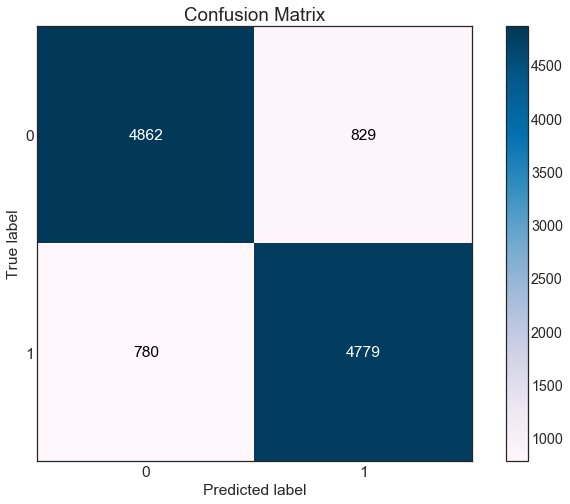

In [47]:
skplt.metrics.plot_confusion_matrix(TestLabels, Prediction ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [48]:
print(np.round(MyModelNB.predict_proba(TestDF),2))

[[0.01 0.99]
 [0.   1.  ]
 [0.59 0.41]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]]


In [49]:
from sklearn import metrics

print(metrics.classification_report(TestLabels, Prediction))
print(metrics.confusion_matrix(TestLabels, Prediction))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5691
           1       0.85      0.86      0.86      5559

    accuracy                           0.86     11250
   macro avg       0.86      0.86      0.86     11250
weighted avg       0.86      0.86      0.86     11250

[[4862  829]
 [ 780 4779]]


In [50]:
import pickle
# save the model to disk
filename = 'MNB_model.sav'
pickle.dump(MyModelNB, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(TestLabels, TestDF)
#print(result)

In [51]:
#word_freq = dict(zip(My_CV1.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
#word_counter = collections.Counter(word_freq)
#word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
#fig, ax = plt.subplots(figsize=(12, 10))
#sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
#plt.show();

In [52]:
def rev_important_features(vectorizer,classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names), reverse = True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names), reverse = True)[:n]
    print("Important words in negative reviews: ")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in positive reviews: ")
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat)


In [53]:
rev_important_features(My_CV1,MyModelNB, 20)

Important words in negative reviews: 
0 13926.0 one
0 11748.0 like
0 7960.0 even
0 7810.0 good
0 7675.0 bad
0 7443.0 would
0 6493.0 time
0 6425.0 really
0 5637.0 see
0 5419.0 get
0 5363.0 story
0 5314.0 much
0 4940.0 people
0 4927.0 could
0 4823.0 make
0 4624.0 made
0 4430.0 first
0 4397.0 well
0 4359.0 movies
0 4307.0 plot
-----------------------------------------
Important words in positive reviews: 
1 14268.0 one
1 9203.0 like
1 7768.0 good
1 6806.0 story
1 6760.0 time
1 6644.0 great
1 6537.0 well
1 6517.0 see
1 5646.0 really
1 5645.0 also
1 5581.0 would
1 5021.0 even
1 4767.0 first
1 4743.0 much
1 4539.0 love
1 4531.0 people
1 4476.0 best
1 4371.0 life
1 4350.0 get
1 4121.0 way


In [54]:
# top positive and negative features 
feature_to_coef = {
    word: coef for word, coef in zip(
        My_CV1.get_feature_names(), MyModelNB.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('one', -4.602003779372975)
('like', -5.040454959148294)
('good', -5.20995167535313)
('story', -5.342141636855599)
('time', -5.348922323212873)
('great', -5.366228439156204)
('well', -5.382461823019394)
('see', -5.385525550906044)
('really', -5.528968700630713)
('also', -5.529145801490117)
('would', -5.540545996207284)
('even', -5.64626487058602)
('first', -5.698166201558365)
('much', -5.7032124696259885)
('love', -5.747166119268156)
('people', -5.748929788155653)
('best', -5.761139952062585)
('life', -5.784872561007122)
('get', -5.789687427582871)
('way', -5.843754648853146)



('avoid like', -14.16784841030355)
('caligula', -14.16784841030355)
('concorde', -14.16784841030355)
('piece garbage', -14.16784841030355)
('worst films', -14.16784841030355)
('absolutely terrible', -13.474701229743605)
('acting awful', -13.474701229743605)
('acting horrible', -13.474701229743605)
('avoid costs', -13.474701229743605)
('boll', -13.474701229743605)
('horrible acting', -13.474701229743605)
('possi

In [55]:
def predict_category(s, train=TestLabels, model=MyModelNB):
    pred = model.predict([s])
    return train.target_names[pred[0]]

### __BNB__

In [56]:
BernModel = BernoulliNB()
BernModel.fit(TrainDFB_nolabels, TrainLabelsB)
#BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
PredictionB = BernModel.predict(TestDFB)
print("\nBernoulli prediction:\n", BernModel.predict(TestDFB))
print("\nActual:")
print(TestLabelsB)


Bernoulli prediction:
 ['1' '0' '1' ... '0' '0' '1']

Actual:
10109    1
18683    1
19601    1
20376    1
5467     0
        ..
15831    0
18676    0
22119    0
21254    1
28034    0
Name: LABEL, Length: 11250, dtype: object


In [57]:
bn_matrix = confusion_matrix(TestLabelsB, BernModel.predict(TestDFB))
print("\nThe confusion  matrix is:")
print(bn_matrix)


The confusion  matrix is:
[[4888  743]
 [ 723 4896]]


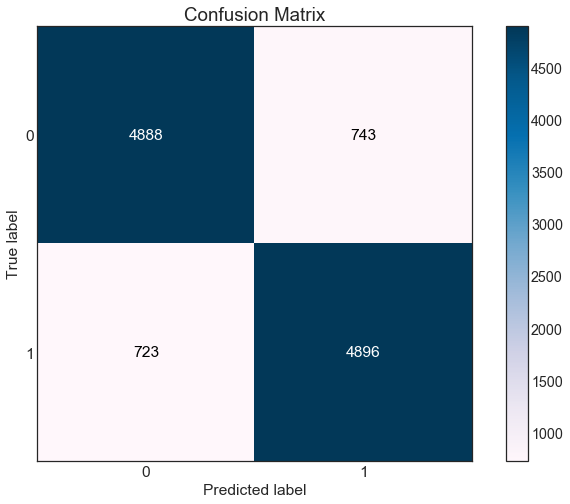

In [58]:
skplt.metrics.plot_confusion_matrix(TestLabelsB, PredictionB,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [59]:
print(np.round(BernModel.predict_proba(TestDFB),2))


[[0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 ...
 [1.   0.  ]
 [0.88 0.12]
 [0.   1.  ]]


In [60]:
print(metrics.classification_report(TestLabels, PredictionB))
print(metrics.confusion_matrix(TestLabels, PredictionB))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      5691
           1       0.49      0.49      0.49      5559

    accuracy                           0.49     11250
   macro avg       0.49      0.49      0.49     11250
weighted avg       0.49      0.49      0.49     11250

[[2788 2903]
 [2823 2736]]


In [61]:
# top positive and negative features 
feature_to_coef = {
    word: coef for word, coef in zip(
        My_CV1.get_feature_names(), BernModel.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('know anything', -0.8645111373153984)
('genius', -0.9930610388740178)
('suicide', -1.065222083944839)
('uma', -1.0810653250753006)
('glimpses', -1.0960214162289503)
('skits', -1.1289786807711977)
('victorian', -1.2451996996351316)
('preston', -1.2687996149760057)
('encouraged', -1.3058408866563553)
('meeting', -1.3211646825360663)
('fathers', -1.3243151935194764)
('begs', -1.3827906634233713)
('one bit', -1.4361991398321052)
('long ago', -1.4798054582757914)
('let say', -1.4878808722813366)
('like know', -1.5087042906777874)
('robbed', -1.520501790450603)
('tunes', -1.5356242871866836)
('kingsley', -1.538818611109586)
('strongly recommend', -1.5665731408570016)



('attract', -9.480825419599443)
('bug', -9.480825419599443)
('combines', -9.480825419599443)
('versa', -9.480825419599443)
('able get', -8.787678239039497)
('act like', -8.787678239039497)
('attracted', -8.787678239039497)
('befriends', -8.787678239039497)
('blah blah', -8.787678239039497)
('coming', -8.787678239039497)
('cr

### __MNB__

##### __-TFIDF__

In [62]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB1= MultinomialNB()

MyModelNB1.fit(TrainDF_nolabels_tf, TrainLabels_tf)
Prediction = MyModelNB1.predict(TestDF_tf)
print("\nThe prediction from NB is:")
print(Prediction)
print("\nThe actual labels are:")
print(TestLabels_tf)


The prediction from NB is:
['0' '1' '0' ... '0' '1' '1']

The actual labels are:
27811    0
17891    1
10747    1
18179    0
30535    0
        ..
5804     0
24887    1
23215    0
10768    1
31856    1
Name: LABEL, Length: 11250, dtype: object


In [63]:
## confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(TestLabels_tf, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)


The confusion matrix is:
[[4756  854]
 [ 722 4918]]


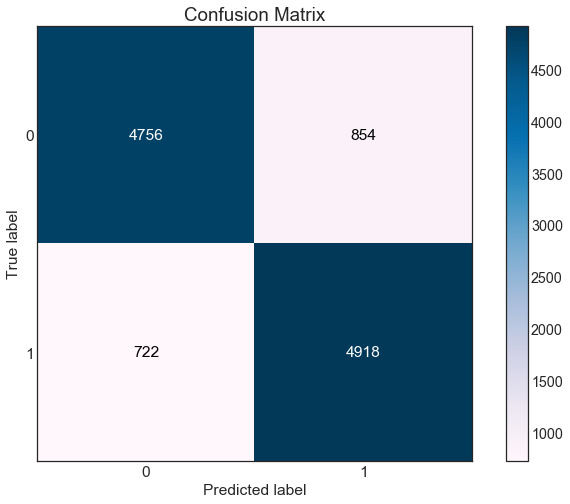

In [64]:
skplt.metrics.plot_confusion_matrix(TestLabels_tf, Prediction ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [65]:
print(np.round(MyModelNB1.predict_proba(TestDF_tf),2))

[[0.76 0.24]
 [0.11 0.89]
 [0.56 0.44]
 ...
 [0.83 0.17]
 [0.24 0.76]
 [0.18 0.82]]


In [66]:
from sklearn import metrics

print(metrics.classification_report(TestLabels_tf, Prediction))
print(metrics.confusion_matrix(TestLabels_tf, Prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5610
           1       0.85      0.87      0.86      5640

    accuracy                           0.86     11250
   macro avg       0.86      0.86      0.86     11250
weighted avg       0.86      0.86      0.86     11250

[[4756  854]
 [ 722 4918]]


### __SVM__

__- CountVect__

In [67]:
from sklearn.svm import LinearSVC

SVM_Model1=LinearSVC(C=0.01, multi_class="crammer_singer")
SVM_Model1.fit(TrainDF_nolabels, TrainLabels)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [68]:
print("SVM prediction:\n", SVM_Model1.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM prediction:
 ['1' '0' '1' ... '0' '0' '0']
Actual:
14641    1
3022     1
13651    1
3129     0
36865    0
        ..
20249    0
21718    1
36798    0
1587     0
10802    0
Name: LABEL, Length: 11250, dtype: object


In [69]:
SVM_matrix = confusion_matrix(TestLabels, SVM_Model1.predict(TestDF))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")


The confusion matrix is:
[[5003  688]
 [ 569 4990]]





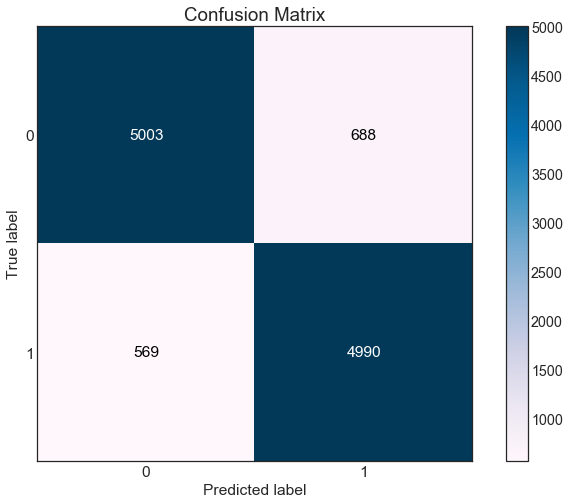

In [70]:
skplt.metrics.plot_confusion_matrix(TestLabels, SVM_Model1.predict(TestDF),normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

In [71]:
print(metrics.classification_report(TestLabels, SVM_Model1.predict(TestDF)))
print(metrics.confusion_matrix(TestLabels, SVM_Model1.predict(TestDF)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5691
           1       0.88      0.90      0.89      5559

    accuracy                           0.89     11250
   macro avg       0.89      0.89      0.89     11250
weighted avg       0.89      0.89      0.89     11250

[[5003  688]
 [ 569 4990]]


In [72]:
import pickle
# save the model to disk
filename = 'SVN-BEST_model.sav'
pickle.dump(SVM_Model1, open(filename, 'wb'))
 

In [73]:
##------------------another kernel
# change the df here
TRAIN= TrainDF_nolabels
TRAIN_Labels= TrainLabels
TEST= TestDF
TEST_Labels= TestLabels


C:\Users\aivii\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM prediction:
 ['0' '0' '1' ... '0' '0' '0']
Actual:
14641    1
3022     1
13651    1
3129     0
36865    0
        ..
20249    0
21718    1
36798    0
1587     0
10802    0
Name: LABEL, Length: 11250, dtype: object

The confusion matrix is:
[[4824  867]
 [ 886 4673]]





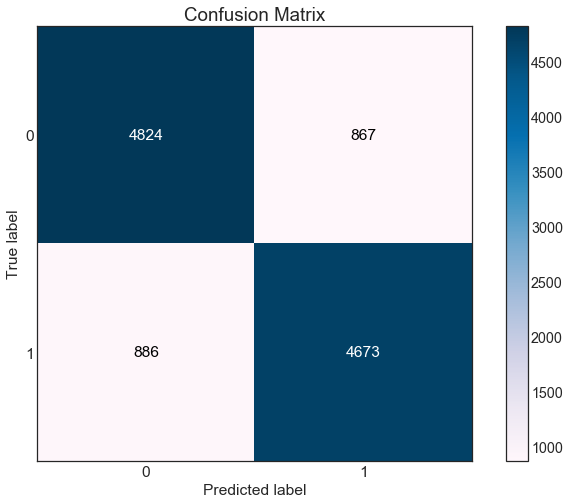

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5691
           1       0.84      0.84      0.84      5559

    accuracy                           0.84     11250
   macro avg       0.84      0.84      0.84     11250
weighted avg       0.84      0.84      0.84     11250

[[4824  867]
 [ 886 4673]]


In [74]:
## change the kernels here 
SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(TRAIN, TRAIN_Labels)

print("SVM prediction:\n", SVM_Model1.predict(TEST))
print("Actual:")
print(TEST_Labels)

SVM_matrix = confusion_matrix(TEST_Labels, SVM_Model1.predict(TEST))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")

skplt.metrics.plot_confusion_matrix(TEST_Labels, SVM_Model1.predict(TEST) ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

print(metrics.classification_report(TEST_Labels, SVM_Model1.predict(TEST)))
print(metrics.confusion_matrix(TEST_Labels, SVM_Model1.predict(TEST)))

In [75]:
"""## RBF
SVM_Model2=sklearn.svm.SVC(C=0.0001, kernel='rbf', 
                           verbose=True, gamma="auto")
SVM_Model2.fit(TRAIN, TRAIN_Labels)

print("SVM prediction:\n", SVM_Model2.predict(TEST))
print("Actual:")
print(TEST_Labels)

SVM_matrix = confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")

skplt.metrics.plot_confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST) ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

print(metrics.classification_report(TEST_Labels, SVM_Model2.predict(TEST)))
print(metrics.confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST)))"""

'## RBF\nSVM_Model2=sklearn.svm.SVC(C=0.0001, kernel=\'rbf\', \n                           verbose=True, gamma="auto")\nSVM_Model2.fit(TRAIN, TRAIN_Labels)\n\nprint("SVM prediction:\n", SVM_Model2.predict(TEST))\nprint("Actual:")\nprint(TEST_Labels)\n\nSVM_matrix = confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST))\nprint("\nThe confusion matrix is:")\nprint(SVM_matrix)\nprint("\n\n")\n\nskplt.metrics.plot_confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST) ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)\nplt.show()\n\nprint(metrics.classification_report(TEST_Labels, SVM_Model2.predict(TEST)))\nprint(metrics.confusion_matrix(TEST_Labels, SVM_Model2.predict(TEST)))'

In [76]:
"""## POLY
SVM_Model3=sklearn.svm.SVC(C=0.0001, kernel='poly',degree=2,
                           gamma="auto", verbose=True)

print(SVM_Model3)
SVM_Model3.fit(TRAIN, TRAIN_Labels)

print("SVM prediction:\n", SVM_Model3.predict(TEST))
print("Actual:")
print(TEST_Labels)

SVM_matrix = confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST))
print("\nThe confusion matrix is:")
print(SVM_matrix)
print("\n\n")

skplt.metrics.plot_confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST) ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)
plt.show()

print(metrics.classification_report(TEST_Labels, SVM_Model3.predict(TEST)))
print(metrics.confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST)))"""

'## POLY\nSVM_Model3=sklearn.svm.SVC(C=0.0001, kernel=\'poly\',degree=2,\n                           gamma="auto", verbose=True)\n\nprint(SVM_Model3)\nSVM_Model3.fit(TRAIN, TRAIN_Labels)\n\nprint("SVM prediction:\n", SVM_Model3.predict(TEST))\nprint("Actual:")\nprint(TEST_Labels)\n\nSVM_matrix = confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST))\nprint("\nThe confusion matrix is:")\nprint(SVM_matrix)\nprint("\n\n")\n\nskplt.metrics.plot_confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST) ,normalize=False,figsize=(12,8), cmap=plt.cm.PuBu)\nplt.show()\n\nprint(metrics.classification_report(TEST_Labels, SVM_Model3.predict(TEST)))\nprint(metrics.confusion_matrix(TEST_Labels, SVM_Model3.predict(TEST)))'

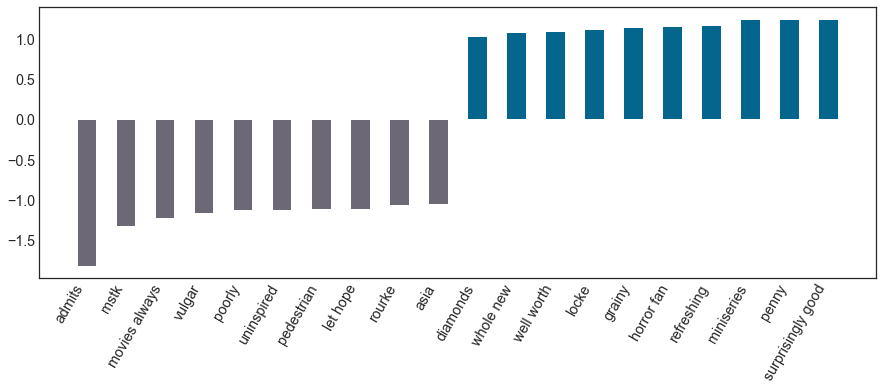

In [77]:
def plot_coefficients(MODEL=SVM_Model1, COLNAMES=TrainDF_nolabels.columns, top_features=10):
    ## Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["#6d6875" if c < 0 else "#05668d" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()
    

plot_coefficients()


__- TfidfVect__

In [78]:
"""feature_ranks = sorted(zip(SVM_Model1.coef_[0], My_CV1.get_feature_names()))

## get the 10 features that are best indicators of very positivesentiment (they are at the bottom of the ranked list)
very_positive_10 = feature_ranks[-10:]
print("Very positive words")
for i in range(0, len(very_positive_10)):
    print(very_positive_10[i])
print()

## get 10 features that are least relevant to "very positive" sentiment (they are at the top of the ranked list)
not_very_positive_10 = feature_ranks[:10]
print("not very positive words")
for i in range(0, len(not_very_positive_10)):
    print(not_very_positive_10[i])
print()"""


'feature_ranks = sorted(zip(SVM_Model1.coef_[0], My_CV1.get_feature_names()))\n\n## get the 10 features that are best indicators of very positivesentiment (they are at the bottom of the ranked list)\nvery_positive_10 = feature_ranks[-10:]\nprint("Very positive words")\nfor i in range(0, len(very_positive_10)):\n    print(very_positive_10[i])\nprint()\n\n## get 10 features that are least relevant to "very positive" sentiment (they are at the top of the ranked list)\nnot_very_positive_10 = feature_ranks[:10]\nprint("not very positive words")\nfor i in range(0, len(not_very_positive_10)):\n    print(not_very_positive_10[i])\nprint()'

In [79]:
# change the df here
TRAIN= TrainDF_nolabels_tf
TRAIN_Labels= TrainLabels_tf
TEST= TestDF_tf
TEST_Labels= TestLabels_tf


#### Topic Modelling 